In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('foodtruckdataset.csv')

In [3]:
df.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.describe()

,X,Y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
df

,X,Y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [9]:
xbar = np.mean(df['X'])
ybar = np.mean(df['Y'])
print(xbar, ybar)

8.159799999999999 5.839135051546393


In [17]:
x_min_xbar = []
y_min_ybar = []

for i in range(len(df['X'])):
    x_min_xbar.append(df.loc[i, 'X'] - xbar)
    y_min_ybar.append(df.loc[i, 'Y'] - ybar)
# print(x_min_xbar)
# print(y_min_ybar)
df['X-X^'] = x_min_xbar
df['Y-Y^'] = y_min_ybar
df

,X,Y,X-X^,Y-Y^
0,6.1101,17.59200,-2.0497,11.752865
1,5.5277,9.13020,-2.6321,3.291065
2,8.5186,13.66200,0.3588,7.822865
3,7.0032,11.85400,-1.1566,6.014865
4,5.8598,6.82330,-2.3000,0.984165
...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765
93,5.3054,1.98690,-2.8544,-3.852235
94,8.2934,0.14454,0.1336,-5.694595
95,13.3940,9.05510,5.2342,3.215965


In [19]:
x_y_min_mean = []
for i in range(len(x_min_xbar)):
    x_y_min_mean.append(x_min_xbar[i]*y_min_ybar[i])
# x_y_min_mean
df['(X-X^)*(Y-Y^)'] = x_y_min_mean
df

,X,Y,X-X^,Y-Y^,(X-X^)*(Y-Y^)
0,6.1101,17.59200,-2.0497,11.752865,-24.089847
1,5.5277,9.13020,-2.6321,3.291065,-8.662412
2,8.5186,13.66200,0.3588,7.822865,2.806844
3,7.0032,11.85400,-1.1566,6.014865,-6.956793
4,5.8598,6.82330,-2.3000,0.984165,-2.263579
...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794
93,5.3054,1.98690,-2.8544,-3.852235,10.995820
94,8.2934,0.14454,0.1336,-5.694595,-0.760798
95,13.3940,9.05510,5.2342,3.215965,16.833004


In [21]:
x_sqr = []
for i in x_min_xbar:
    x_sqr.append(i*i)
# x_sqr
df['(X-X^)^2'] = x_sqr
df

,X,Y,X-X^,Y-Y^,(X-X^)*(Y-Y^),(X-X^)^2
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000
...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850


In [28]:
sdf = df.sum(axis=0)
sdf = pd.DataFrame(sdf)
sdf

,0
X,7.915006e+02
Y,5.663961e+02
X-X^,1.181277e-13
Y-Y^,-9.414691e-14
(X-X^)*(Y-Y^),1.715220e+03
(X-X^)^2,1.437696e+03


In [35]:
num = sdf.loc['(X-X^)*(Y-Y^)',0]
denom = sdf.loc['(X-X^)^2',0]
print(num)
print(denom)

1715.2195285389998
1437.6958578599997


In [36]:
m = num/denom
print(m)

1.193033644189594


In [37]:
c = ybar - m*xbar
print(c)

-3.8957808783118537


In [39]:
y_pred = []
for x in df['X']:
    y_pred.append(m*x+c)
# print(y_pred)
df['y_pred'] = y_pred
df

,X,Y,X-X^,Y-Y^,(X-X^)*(Y-Y^),(X-X^)^2,y_pred
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,3.393774
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,2.698951
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,6.267196
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,4.459272
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,3.095158
...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,3.108162
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,2.433740
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,5.998524
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,12.083712


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


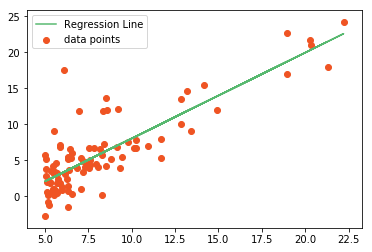

In [46]:
# plt.plot(df['X'], df['Y'])
plt.plot(df['X'], df['y_pred'], color='#58b970', label='Regression Line')
plt.scatter(df['X'], df['Y'],c='#ef5423', label='data points')
plt.legend()
plt.show()

In [56]:
#Finding R^2
l = []
m = []
for i in df['y_pred']:
    l.append((i - ybar)**2)
for i in df['Y']:
    m.append((i - ybar)**2)
df['y_pred-y^2'] = l
df['y-ybar^2'] = m
df
# df.drop(['y_pred-y^'])


,X,Y,X-X^,Y-Y^,(X-X^)*(Y-Y^),(X-X^)^2,y_pred,y_pred-y^2,y-ybar^2
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,3.393774,5.979791,138.129834
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,2.698951,9.860755,10.831108
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,6.267196,0.183236,61.197216
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,4.459272,1.904021,36.178600
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,3.095158,7.529412,0.968581
...,...,...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,3.108162,7.458215,1.859855
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,2.433740,11.596717,14.839715
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,5.998524,0.025405,32.428413
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,12.083712,38.994738,10.342431


In [59]:
sdf = df.sum(axis=0)
sdf = pd.DataFrame(sdf)
sdf

,0
X,7.915006e+02
Y,5.663961e+02
X-X^,1.181277e-13
Y-Y^,-9.414691e-14
(X-X^)*(Y-Y^),1.715220e+03
(X-X^)^2,1.437696e+03
y_pred,5.663961e+02
y_pred-y^2,2.046315e+03
y-ybar^2,2.914847e+03


In [64]:
num = sdf.loc['y_pred-y^2',0]
denom = sdf.loc['y-ybar^2',0]
r = num/denom
print(r)
#sse = summation(y^ - y)^2
sse = sdf.loc['y_pred-y^2',0]
print(sse)

0.70203155378414
2046.3146047180408
